## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#Methodology: looked at both datasets to see what colun could be used to merge the data. They both share "Mouse ID"
mouse_results = study_results.merge(mouse_metadata, on='Mouse ID')

# Display the data table for preview
mouse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
number_mice = mouse_results['Mouse ID'].nunique()
number_mice

249

In [3]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_results[mouse_results.duplicated(["Mouse ID","Timepoint"])]

In [4]:
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results = mouse_results[mouse_results["Mouse ID"] != "g989"]

In [6]:
clean_results = clean_results.rename(columns={"Tumor Volume (mm3)":"Tumor_volume","Drug Regimen":"Drug"})

In [7]:
clean_results.head()

,Mouse ID,Timepoint,Tumor_volume,Metastatic Sites,Drug,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary Statistics

In [8]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [9]:
#set up the groupby and the mean and median
drug_group = clean_results.groupby(["Drug"]).Tumor_volume.agg(["mean","median"])

In [10]:
drug_group.head()

,mean,median
Drug,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285


In [11]:
#set up dictionaries of tumor size for each drug regimine
capomulin = clean_results.loc[clean_results['Drug']=="Capomulin",['Tumor_volume']]
ceftamin = clean_results.loc[clean_results['Drug']=="Ceftamin",['Tumor_volume']]
infubinol = clean_results.loc[clean_results['Drug']=="Infubinol",['Tumor_volume']]
ketapril = clean_results.loc[clean_results['Drug']=="Ketapril",['Tumor_volume']]
naftisol = clean_results.loc[clean_results['Drug']=="Naftisol",['Tumor_volume']]

In [12]:
# get the variance, standard deviation, and SEM of the tumor volume. 
var_capomulin = np.var(capomulin)
std_capomulin = np.std(capomulin)
sem_capomulin = st.sem(capomulin)

var_ceftamin = np.var(ceftamin)
std_ceftamin = np.std(ceftamin)
sem_ceftamin = st.sem(ceftamin)

var_infubinol = np.var(infubinol)
std_infubinol = np.std(infubinol)
sem_infubinol = st.sem(infubinol)

var_ketapril = np.var(ketapril)
std_ketapril = np.std(ketapril)
sem_ketapril = st.sem(ketapril)

var_naftisol = np.var(naftisol)
std_naftisol = np.std(naftisol)
sem_naftisol = st.sem(naftisol)

In [13]:
# Assemble the resulting series into a single summary dataframe.
stats_summary = {'Drug':['Capomulin', 'Ceftamin' , 'Infubinol', 'Ketapril', 'Naftisol'],
    'Variance':[var_capomulin.values[0], var_ceftamin.values[0], var_infubinol.values[0], var_ketapril.values[0], var_naftisol.values[0]],
                'Std_Dev':[std_capomulin.values[0], std_ceftamin.values[0], std_infubinol.values[0], std_ketapril.values[0], std_naftisol.values[0]],
                 'SEM':[sem_capomulin, sem_ceftamin, sem_infubinol, sem_ketapril, sem_naftisol]}

In [14]:
stats_summary_df = pd.DataFrame(stats_summary)
stats_summary_df.set_index('Drug')


,Variance,Std_Dev,SEM
Drug,,,
Capomulin,24.839296,4.983904,[0.32934562340083096]
Ceftamin,39.069446,6.250556,[0.46982053275261093]
Infubinol,42.886388,6.548770,[0.4922356938011383]
Ketapril,68.188930,8.257659,[0.6038598237739697]
Naftisol,65.817708,8.112811,[0.5964657512424236]


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_summary = drug_group.merge(stats_summary_df, on="Drug")
drug_summary = drug_summary.rename(columns={"Drug":"Drug Regimen","mean":"Mean","median":"Median"})
drug_summary

,Drug Regimen,Mean,Median,Variance,Std_Dev,SEM
0,Capomulin,40.675741,41.557809,24.839296,4.983904,[0.32934562340083096]
1,Ceftamin,52.591172,51.776157,39.069446,6.250556,[0.46982053275261093]
2,Infubinol,52.884795,51.820584,42.886388,6.548770,[0.4922356938011383]
3,Ketapril,55.235638,53.698743,68.188930,8.257659,[0.6038598237739697]
4,Naftisol,54.331565,52.509285,65.817708,8.112811,[0.5964657512424236]


In [16]:
# Using the aggregation method, produce the same summary statistics in a single line
drug_group = clean_results.groupby(["Drug"]).Tumor_volume.agg(["mean","median","var","std","sem"])
drug_group

,mean,median,var,std,sem
Drug,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_drug_group = clean_results.groupby(["Drug"])
num_drug_df = num_drug_group.count()
num_drug_df = pd.DataFrame(num_drug_df["Tumor_volume"])
num_drug_df

,Tumor_volume
Drug,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


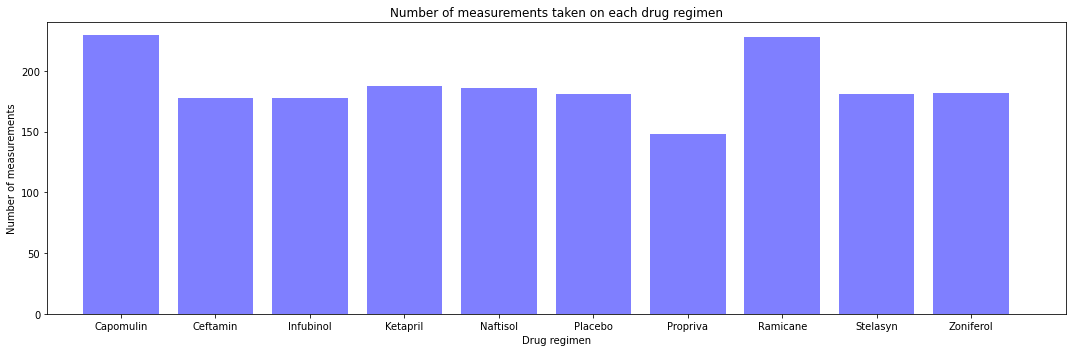

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(num_drug_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(15,5))
plt.bar(x_axis, num_drug_df["Tumor_volume"],color='b',alpha=0.5,align="center")
plt.xticks(tick_locations, num_drug_df.index, rotation="horizontal")
plt.xlim(-0.78,len(x_axis))
plt.ylim(0,max(num_drug_df["Tumor_volume"])+10)
plt.title("Number of measurements taken on each drug regimen")
plt.xlabel("Drug regimen")
plt.ylabel("Number of measurements")
plt.tight_layout()
plt.show()

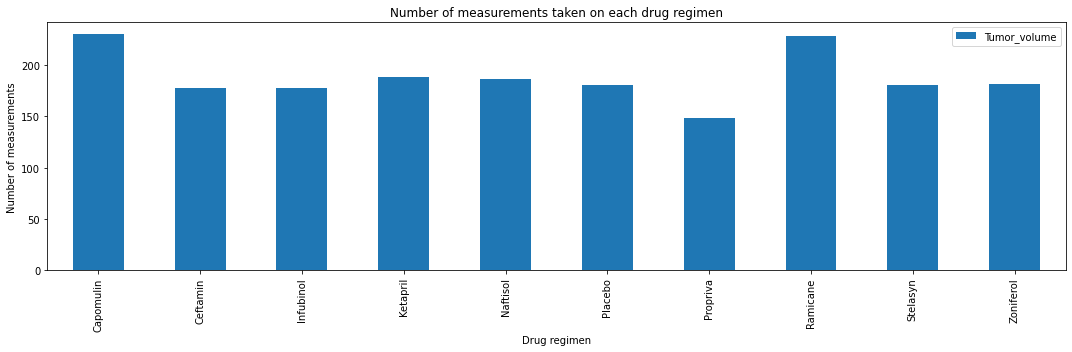

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas
num_drug_df.plot(kind="bar", figsize=(15,5))
plt.title("Number of measurements taken on each drug regimen")
plt.xlabel("Drug regimen")
plt.ylabel("Number of measurements")
plt.tight_layout()
plt.show()

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

ct_male = clean_results[["Mouse ID","Sex"]].loc[clean_results["Sex"] == "Male"]
ct_male = ct_male.groupby(["Mouse ID"])
ct_male = ct_male["Mouse ID"].nunique()
ct_male = len(ct_male) 

ct_female = clean_results[["Mouse ID","Sex"]].loc[clean_results["Sex"] == "Female"]
ct_female = ct_female.groupby(["Mouse ID"])
ct_female = ct_female["Mouse ID"].nunique()
ct_female = len(ct_female)        

print(f'The count of male mice is {ct_male} and the count of female mice is {ct_female}.')

The count of male mice is 125 and the count of female mice is 123.


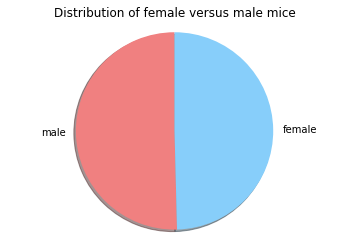

In [21]:
plt.title("Distribution of female versus male mice")

sex = ["male", "female"]
sex_count = [ct_male,ct_female]
my_colors = ["lightcoral", "lightskyblue"]

plt.pie(sex_count, labels=sex, colors=my_colors, shadow=True, startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# CAME BACK TO FIX THIS
ordered_results = clean_results.groupby("Mouse ID")["Timepoint"].max()
ordered_results = pd.DataFrame(ordered_results,columns=['Timepoint'])
ordered_results.head()

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30


In [23]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ordered_results = pd.merge(ordered_results, clean_results, on=["Mouse ID","Timepoint"])
ordered_results = ordered_results.loc[(ordered_results["Drug"] == "Capomulin") 
                                      | (ordered_results["Drug"] == "Ramicane")
                                      | (ordered_results["Drug"] == "Infubinol")
                                      | (ordered_results["Drug"] == "Ceftamin")]

ordered_results

,Mouse ID,Timepoint,Tumor_volume,Metastatic Sites,Drug,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [24]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = ordered_results['Tumor_volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
The the median of tumor volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [25]:
outlier_occupancy = ordered_results.loc[(ordered_results['Tumor_volume'] < lower_bound) |
                                        (ordered_results['Tumor_volume'] > upper_bound)]

print(f"The minimum median income of the potential outliers is {outlier_occupancy['Tumor_volume'].min()} - meaning none")
print(f"The maximum median income of the potential outliers is {outlier_occupancy['Tumor_volume'].max()} - meaning none")
print(f"There are no tumor volumes below {lower_bound}(mm3) or above {upper_bound}(mm3)")

The minimum median income of the potential outliers is nan - meaning none
The maximum median income of the potential outliers is nan - meaning none
There are no tumor volumes below 3.0739668737499812(mm3) or above 94.04403868375002(mm3)


In [26]:
# Put treatments into a list for for loop (and later for plot labels) 
drugs = ["Infubinol", "Ceftamin", "Ramicane", "Capomulin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []
    
for drug in drugs:
    tumor_volumes.append(ordered_results[ordered_results["Drug"] == drug]["Tumor_volume"])


In [27]:
    # add subset 
Infubinol = tumor_volumes[0]
Ceftamin = tumor_volumes[1]
Ramicane = tumor_volumes[2]
Capomulin = tumor_volumes[3]

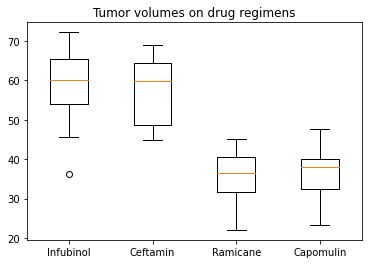

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
volume_by_drug = [Infubinol, Ceftamin, Ramicane, Capomulin]
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor volumes on drug regimens")
#axl.set_ylabel("Tumor volume (mm3)")
ax1.boxplot(volume_by_drug, labels = drugs)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_results = clean_results.loc[(clean_results["Drug"] == "Capomulin")]

#used a sample to pick a random mouse, the mouse given was g316
#pick_a_mouse = capomulin_results.sample()

mouse_g316 = capomulin_results.loc[(capomulin_results["Mouse ID"] == "g316")]
mouse_g316.sort_values(by="Timepoint")
                                                                                       
time = mouse_g316["Timepoint"]
tumor = mouse_g316["Tumor_volume"]

mouse_line = plt.plot(time, tumor, color="red",label="Tumor size over time")

plt.title("Tumor volume versus timepoint for a mouse treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor volume in mm3")
plt.legend(mouse_line,loc="best")
plt.grid()
plt.show()

In [ ]:
capomulin_results = capomulin_results.groupby(["Mouse ID"]).mean()
capomulin_results

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(capomulin_results['Weight (g)'], capomulin_results['Tumor_volume'])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Average tumor volume vs. mouse weight for the Capomulin regimen")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress

x_values = capomulin_results["Weight (g)"]
y_values = capomulin_results["Tumor_volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight in grams')
plt.ylabel('Tumor volume in mm3')
print(f'The r-squared is: {rvalue**2}')
plt.show()